# Example 2: Entangled photons
In this example, we consider HOM interference between two photons that are initially entangled. The photons are described by their joint spectral amplitdue (JSA). In Part a) we consider entangled photons with a join-Gaussian JSA and in Part b) we consider entangled photons generated by spontaneous parametric downconversion

#### Example 2 a) Joint Gaussians

In [1]:
from spectral_hom.main import JointGaussianJSA, JointGaussianCoincidence

/Users/abranczyk/_github_repos/spectral-hom/spectral_hom/main.py:263: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5, 4))
/Users/abranczyk/_github_repos/spectral-hom/spectral_hom/main.py:275: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.colorbar(im0, cax=make_axes_locatable(ax).append_axes("right", size="5%", pad=0.025))


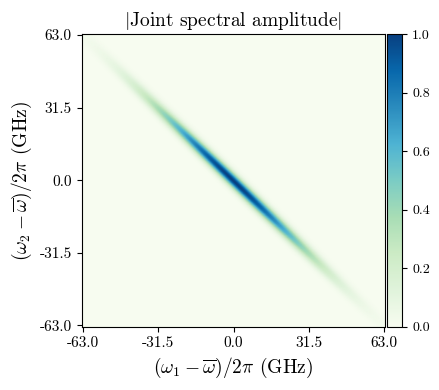

/Users/abranczyk/_github_repos/spectral-hom/spectral_hom/main.py:280: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5, 4))


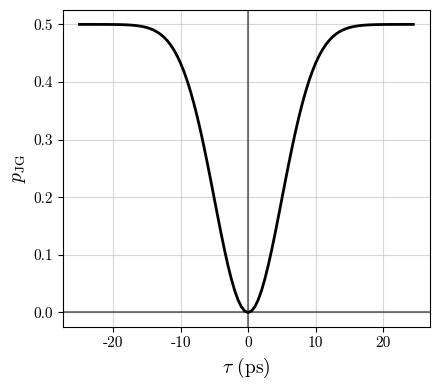

In [2]:
# double Gaussian properties
double_gaussian_params = {'lambda_c': 780,  # center wavelength (nm)
                          'pulse_duration': 100,  # effective pulse duration  (ps)
                          'coherence_time': 5,  # coherence time  (ps)
                          }

# create double Gaussian object
double_gaussian = JointGaussianJSA(double_gaussian_params)

# create double Gaussian coincidence object 
double_gaussian_coincidence = JointGaussianCoincidence({'double_gaussian': double_gaussian})

# plot coincidence 
double_gaussian_coincidence.plot_coincidence('JSA_joint_gaussians', 'HOM_joint_gaussians')

#### Example 2 b) Spontaneous Parametric Down Conversion

In [3]:
from spectral_hom.main import twopi, speed_of_light, Sellmeier, wave_number, ts, fs
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

Set the center frequencies 

In [4]:
# Define the central frequencies of the two down-converted modes and the pump
omega_s_0 = 1265832916458229.0  # signal mode central frequency
omega_i_0 = 1265832916458229.0  # idler mode central frequency
omega_p_0 = omega_s_0 + omega_i_0  # pump mode central frequency

# Calculate the corresponding wavelengths in micrometers
lambda_s_0 = twopi * speed_of_light * 1e6 / omega_s_0
lambda_i_0 = twopi * speed_of_light * 1e6 / omega_i_0
lambda_p_0 = twopi * speed_of_light * 1e6 / omega_p_0

print(f"signal wavelength: {lambda_s_0: .3f} um")
print(f"idler wavelength: {lambda_i_0: .3f} um")
print(f"pump wavelength: {lambda_p_0: .3f} um")

signal wavelength:  1.488 um
idler wavelength:  1.488 um
pump wavelength:  0.744 um


Set wave-numbers using the index of refraction calculated from the Sellmeier equation. Here we use parameters given on the United Crystals website: https://www.unitedcrystals.com/KTPProp.html

In [5]:
# create a Sellmeier class along the y- and z-axis
sel_y = Sellmeier(3.0065, 0.03901, 0.04547, 0.01408)
sel_z = Sellmeier(3.3134, 0.05694, 0.05658, 0.01692)


# define the phase-mismatch which takes the sellmeier class as an input
def phase_mismatch(ws, wi):
    k_s = wave_number(sel_z, ws)
    k_i = wave_number(sel_y, wi)
    k_p = wave_number(sel_y, ws + wi)
    return k_s + k_i - k_p


delta_k_0 = phase_mismatch(omega_s_0, omega_i_0)
print(f'phase mismatch: {delta_k_0: .2f}')

phase mismatch:  168634.41


In [6]:
# set frequency range
frequency_width = twopi * 3 * 1e12

dw_s = frequency_width / 1000
dw_i = frequency_width / 1000

ws_range = omega_s_0 + np.arange(- frequency_width / 2, frequency_width / 2 + dw_s, dw_s)
wi_range = omega_i_0 + np.arange(- frequency_width / 2, frequency_width / 2 + dw_i, dw_i)

WS_range, WI_range = np.meshgrid(ws_range, wi_range)

#calculate phase-missmatch. Here we subtract the zeroth order phase-mismatch which would be the result of periodicaly poling the material
delta_k = phase_mismatch(WS_range, WI_range) - delta_k_0

In [7]:
# set crystal length
crystal_length = 2e-2  #crystal length in meters
print(f'crystal length: {crystal_length * 1e2} cm')

# set phase-matching function
phase_matching_function = np.sinc(
    crystal_length * delta_k / 2 / np.pi)  # divide by pi because of numpy sinc definition

crystal length: 2.0 cm


In [8]:
# set effective bandwidth of pump
sigma_p = 5e11
print(f'FWHM of pump intensity: {2 * np.sqrt(np.log(2)) * sigma_p * 1e-9 / twopi: .2f} GHz')


def pump(ws, wi):
    return (1 / (sigma_p ** 2 * np.pi)) ** 0.25 * np.exp(-(ws + wi - omega_p_0) ** 2 / 2 / sigma_p ** 2)


# evaluate pump amplitude
alpha = pump(WS_range, WI_range)

FWHM of pump intensity:  132.51 GHz


/var/folders/wp/8xvtrx5d7dd0xk0b0chml7yh0000gp/T/ipykernel_71347/1860682033.py:11: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(4, 4))
/var/folders/wp/8xvtrx5d7dd0xk0b0chml7yh0000gp/T/ipykernel_71347/1860682033.py:26: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.colorbar(im0, cax=make_axes_locatable(ax).append_axes("right", size="5%", pad=0.05))


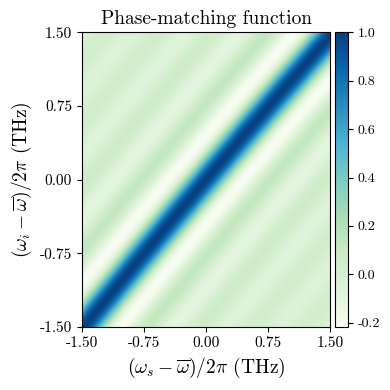

In [9]:
# check range of frequencies by plotting phase-matching function

ticks_s = np.linspace(np.round(np.min((ws_range - omega_s_0) * 1e-12 / twopi), 2),
                      np.round(np.max((ws_range - omega_s_0) * 1e-12 / twopi), 2),
                      5)

ticks_i = np.linspace(np.round(np.min((wi_range - omega_i_0) * 1e-12 / twopi), 2),
                      np.round(np.max((wi_range - omega_i_0) * 1e-12 / twopi), 2),
                      5)
cmap = 'GnBu'
fig, ax = plt.subplots(figsize=(4, 4))
im0 = ax.pcolormesh((WS_range - omega_s_0) * 1e-12 / twopi,
                    (WI_range - omega_i_0) * 1e-12 / twopi,
                    phase_matching_function,
                    #shading='gouraud',
                    #shading='flat',
                    vmin=phase_matching_function.min(),
                    vmax=phase_matching_function.max(),
                    cmap=cmap)
ax.set_xlabel(r"$(\omega_s - \overline{\omega})/2\pi$ (THz)", fontsize=fs)
ax.set_ylabel(r"$(\omega_i - \overline{\omega})/2\pi$ (THz)", fontsize=fs)
ax.set_title(r"Phase-matching function", fontsize=fs)
ax.tick_params(axis='both', labelsize=ts)
ax.set_yticks(ticks_s)
ax.set_xticks(ticks_i)
plt.colorbar(im0, cax=make_axes_locatable(ax).append_axes("right", size="5%", pad=0.05))
plt.tight_layout()
plt.show()

In [10]:
# set normalized joint spectral amplitude

jsa = alpha * phase_matching_function / np.sqrt(
    np.sum(np.abs(alpha * phase_matching_function) ** 2) * dw_s * dw_i)


In [11]:
# define the coincidence probability
@np.vectorize
def coincidence(delay):
    phase = np.exp(-1j * (WS_range - WI_range) * delay)
    return 1 / 2 - 1 / 2 * np.sum(np.conj(jsa) * jsa.T * phase) * dw_s * dw_i

In [12]:
# evaluate 
delay_range = np.linspace(-5e-12, 5e-12, 200)
p_SPDC = np.real_if_close(coincidence(delay_range))

In [13]:
ticks_d = np.round(np.linspace(np.min(delay_range * 1e12), np.max(delay_range * 1e12), 5), 2)

/var/folders/wp/8xvtrx5d7dd0xk0b0chml7yh0000gp/T/ipykernel_71347/4153314373.py:9: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5, 4))
/var/folders/wp/8xvtrx5d7dd0xk0b0chml7yh0000gp/T/ipykernel_71347/4153314373.py:23: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.colorbar(im0, cax=make_axes_locatable(ax).append_axes("right", size="5%", pad=0.025))


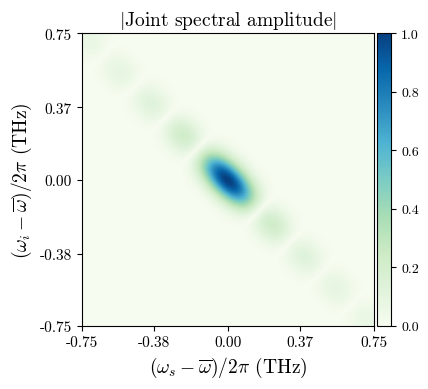

/var/folders/wp/8xvtrx5d7dd0xk0b0chml7yh0000gp/T/ipykernel_71347/4153314373.py:30: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5, 4))


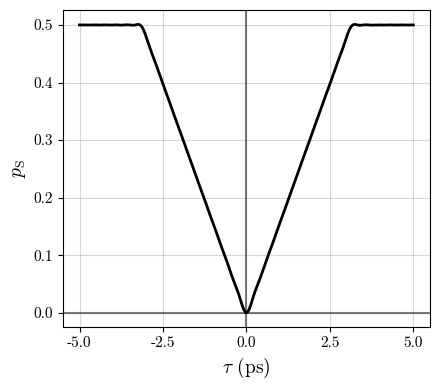

In [14]:
# plot joint spectral amplitude and coincidence probability

ticks_s = np.round(np.linspace(np.min((ws_range - omega_s_0)[250:750] * 1e-12 / twopi),
                               np.max((ws_range - omega_s_0)[250:750] * 1e-12 / twopi), 5), 2)

ticks_i = np.round(np.linspace(np.min((wi_range - omega_i_0)[250:750] * 1e-12 / twopi),
                               np.max((wi_range - omega_i_0)[250:750] * 1e-12 / twopi), 5), 2)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5, 4))
im0 = ax.pcolormesh((WS_range - omega_s_0)[250:750, 250:750] * 1e-12 / twopi,
                       (WI_range - omega_i_0)[250:750, 250:750] * 1e-12 / twopi,
                       np.abs(jsa[250:750, 250:750]) / np.max(np.abs(jsa[250:750, 250:750])),
                       shading='gouraud',
                       cmap=cmap,
                    )
ax.set_xlabel(r"$(\omega_s - \overline{\omega})/2\pi$ (THz)", fontsize=fs)
ax.set_ylabel(r"$(\omega_i - \overline{\omega})/2\pi$ (THz)", fontsize=fs)
ax.set_title(r"$|$Joint spectral amplitude$|$", fontsize=fs)
ax.tick_params(axis='both', labelsize=ts)
ax.set_yticks(ticks_s)
ax.set_xticks(ticks_i)
ax.set_aspect(1)
plt.colorbar(im0, cax=make_axes_locatable(ax).append_axes("right", size="5%", pad=0.025))

plt.tight_layout()

fig.savefig('figures/JSA_SPDC.pdf', dpi=300, bbox_inches='tight')
plt.show(fig)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5, 4))
ax.plot(delay_range * 1e12, p_SPDC,
           linewidth=2,
           color='black')
ax.set_xlabel(r"$\tau$ (ps)", fontsize=fs)
ax.set_ylabel(r"$p_\mathrm{S}$", fontsize=fs)
ax.tick_params(axis='both', labelsize=ts)
ax.axhline(0, color='black', alpha=0.5)
ax.axvline(0, color='black', alpha=0.5)
ax.set_xticks(ticks_d)
ax.grid('on', alpha = 0.5)
plt.tight_layout()
fig.savefig('figures/HOM_SPDC.pdf', dpi=300, bbox_inches='tight')
plt.show(fig)